# **SentimentArcs (Part 5): Time Series Feature Analysis**

```
Jon Chun
12 Jun 2021: Started
04 Mar 2022: Last Update
```

# **Reference Code**

Surveys:
* https://github.com/prrao87/fine-grained-sentiment (20210409) Fine-grained SA (7 Models)


Other:
* https://github.com/annabiancajones/GA_capstone_project/blob/master/part3_mine_refine.ipynb
* https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6 CV

# **[RESTART RUNTIME] May be Required for these Libaries**

In [1]:
# [RESTART RUNTIME] May be Required (only needed for Plotly)

# Designed Security Hole in older version of PyYAML, must upgrade to use plotly

!pip install pyyaml==5.4.1

     |████████████████████████████████| 636 kB 4.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# **[STEP 1] Manual Configuration/Setup**



## (Popups) Connect Google gDrive

In [2]:
# [INPUT REQUIRED]: Authorize access to Google gDrive

# Connect this Notebook to your permanent Google Drive
#   so all generated output is saved to permanent storage there

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("Attempting to attach your Google gDrive to this Colab Jupyter Notebook")
  drive.mount('/gdrive')
else:
  print("Your Google gDrive is attached to this Colab Jupyter Notebook")

Attempting to attach your Google gDrive to this Colab Jupyter Notebook
Mounted at /gdrive


## (3 Inputs) Define Directory Tree

In [3]:
# [CUSTOMIZE]: Change the text after the Unix '%cd ' command below (change directory)
#              to math the full path to your gDrive subdirectory which should be the 
#              root directory cloned from the SentimentArcs github repo.

# NOTE: Make sure this subdirectory already exists and there are 
#       no typos, spaces or illegals characters (e.g. periods) in the full path after %cd

# NOTE: In Python all strings must begin with an upper or lowercase letter, and only
#         letter, number and underscores ('_') characters should appear afterwards.
#         Make sure your full path after %cd obeys this constraint or errors may appear.



# Step #1: Get full path to SentimentArcs subdir on gDrive
# =======
#@markdown **Accept default path on gDrive or Enter new one:**

Path_to_SentimentArcs = "/gdrive/MyDrive/cdh/sentiment_arcs/" #@param ["/gdrive/MyDrive/sentiment_arcs/"] {allow-input: true}

#@markdown (e.g. /gdrive/MyDrive/research/sentiment_arcs/)



#@markdown **Sentiment Arcs Directory Structure** \
#@markdown \
#@markdown **1. Input Directories:** \
#@markdown (a) Raw textfiles in subdir: ./text_raw/(text_type)/  \
#@markdown (b) Cleaned textfiles in subdir: ./text_clean/(text_type)/ \
#@markdown \
#@markdown **2. Output Directories** \
#@markdown (1) Raw Sentiment time series datafiles and plots in subdir: ./sentiment_raw/(text_type) \
#@markdown (2) Cleaned Sentiment time series datafiles and plots in subdir: ./sentiment_clean/(text_type) \
#@markdown \
#@markdown **Which type of texts are you cleaning?** \

Corpus_Genre = "novels" #@param ["novels", "social_media", "finance"]

Corpus_Type = "new" #@param ["new", "reference"]

#@markdown Please check that the required textfiles and datafiles exist in the correct subdirectories before continuing.


# **[STEP 2] Automatic Configuration/Setup**

In [6]:
# Define all Sub/Dir global CONSTANTS

import os

# Verify in SentimentArcs Root Directory
os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')

%run -i './utils/get_subdirs.py'

get_subdirs(Corpus_Genre, Corpus_Type, 'none')

Verify the Directory Structure:

-------------------------------

          [Corpus Genre]: novels

           [Corpus Type]: new


   [FNAME_SENTIMENT_RAW]: [NONE]


       [SUBDIR_TEXT_RAW]: ./text_raw/novels_text_new_raw/

     [SUBDIR_TEXT_CLEAN]: ./text_clean/novels_text_new_clean/

  [SUBDIR_SENTIMENT_RAW]: ./sentiment_raw/novels_sentiment_new_raw/

[SUBDIR_SENTIMENT_CLEAN]: ./sentiment_clean/novels_sentiment_new_clean/

          [SUBDIR_PLOTS]: ./plots/

           [SUBDIR_DATA]: ./data/

          [SUBDIR_UTILS]: ./utils/



## Configure Jupyter Notebook

In [7]:
# Configure Jupyter

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Enable multiple outputs from one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display
from IPython.display import Image
from ipywidgets import widgets, interactive

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Read YAML Configuration for Corpus and Models 

In [8]:
!pip install pyyaml
import yaml

In [9]:
# Define all Corpus Texts & Ensemble Models as global CONSTANTS

# Verify in SentimentArcs Root Directory
os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')

%run -i './utils/read_yaml.py'

read_yaml(Corpus_Genre, Corpus_Type)

print('SentimentArcs Model Ensemble ------------------------------\n')
model_titles_ls = models_titles_dt.keys()
print('\n'.join(model_titles_ls))


print('\n\nCorpus Texts ------------------------------\n')
corpus_titles_ls = corpus_titles_dt.keys()
print('\n'.join(corpus_titles_ls))


print(f'\n\nThere are {len(model_titles_ls)} Models in the SentimentArcs Ensemble above.\n')
print(f'\nThere are {len(corpus_titles_ls)} Texts in the Corpus above.\n')
print('\n')

SentimentArcs Model Ensemble ------------------------------

AutoGluon_Text
BERT_2IMDB
BERT_Dual_Coding
BERT_Multilingual
BERT_Yelp
CNN_DNN
Distilled_BERT
FLAML_AutoML
Fully_Connected_Network
HyperOpt_CNN_Flair_AutoML
LSTM_DNN
Logistic_Regression
Logistic_Regression_CV
Multilingual_CNN_Stanza_AutoML
Multinomial_Naive_Bayes
Pattern
Random_Forest
RoBERTa_Large_15DB
RoBERTa_XML_8Language
SentimentR_JockersRinker
SentimentR_Jockers
SentimentR_Bing
SentimentR_NRC
SentimentR_SentiWord
SentimentR_SenticNet
SentimentR_LMcD
SentimentR_SentimentR
PySentimentR_JockersRinker
PySentimentR_Huliu
PySentimentR_NRC
PySentimentR_SentiWord
PySentimentR_SenticNet
PySentimentR_LMcD
SyuzhetR_AFINN
SyuzhetR_Bing
SyuzhetR_NRC
SyuzhetR_SyuzhetR
T5_IMDB
TextBlob
VADER
AFINN
XGBoost


Corpus Texts ------------------------------

scollins_thehungergames1
cmieville_thecityandthecity


There are 42 Models in the SentimentArcs Ensemble above.


There are 2 Texts in the Corpus above.





## Install Python Libraries

In [ ]:
# Intentionally left blank

## Load Libraries

In [10]:
import numpy as np

from tqdm._tqdm_notebook import tqdm_notebook
import pandas as pd
tqdm_notebook.pandas()

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('max_colwidth', 100) # -1)

from glob import glob
import copy
import json

2022-03-04 08:10:13,286 : INFO : NumExpr defaulting to 2 threads.


In [11]:
# Plotly Visualizations
# Note: Security Hole in default, must upgrade above
#       !pip install pyyaml==5.4.1

import plotly.graph_objects as go
import plotly.express as px
import plotly

In [12]:
# Scikit Utilities, Metrics, Pipelines and Models

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


## Define Global Parameters

In [13]:
# Define Globals

# Main data structure: Dictionary (key=text_name) of DataFrames (cols: text_raw, text_clean)
corpus_texts_dt = {}

# Verify in SentimentArcs Root Directory
os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')

%run -i './utils/get_globals.py'

SLANG_DT.keys()


dict_keys(['$', '€', '4ao', 'a.m', 'a3', 'aamof', 'acct', 'adih', 'afaic', 'afaict', 'afaik', 'afair', 'afk', 'app', 'approx', 'apps', 'asap', 'asl', 'atk', 'ave.', 'aymm', 'ayor', 'b&b', 'b+b', 'b.c', 'b2b', 'b2c', 'b4', 'b4n', 'b@u', 'bae', 'bak', 'bbbg', 'bbc', 'bbias', 'bbl', 'bbs', 'be4', 'bfn', 'blvd', 'bout', 'brb', 'bros', 'brt', 'bsaaw', 'btw', 'bwl', 'c/o', 'cet', 'cf', 'cia', 'csl', 'cu', 'cul8r', 'cv', 'cwot', 'cya', 'cyt', 'dae', 'dbmib', 'diy', 'dm', 'dwh', 'e123', 'eet', 'eg', 'embm', 'encl', 'encl.', 'etc', 'faq', 'fawc', 'fb', 'fc', 'fig', 'fimh', 'ft.', 'ft', 'ftl', 'ftw', 'fwiw', 'fyi', 'g9', 'gahoy', 'gal', 'gcse', 'gfn', 'gg', 'gl', 'glhf', 'gmt', 'gmta', 'gn', 'g.o.a.t', 'goat', 'goi', 'gps', 'gr8', 'gratz', 'gyal', 'h&c', 'hp', 'hr', 'hrh', 'ht', 'ibrb', 'ic', 'icq', 'icymi', 'idc', 'idgadf', 'idgaf', 'idk', 'ie', 'i.e', 'ifyp', 'IG', 'iirc', 'ilu', 'ily', 'imho', 'imo', 'imu', 'iow', 'irl', 'j4f', 'jic', 'jk', 'jsyk', 'l8r', 'lb', 'lbs', 'ldr', 'lmao', 'lmfao', 

## Setup Matplotlib Style

In [14]:
# Configure Matplotlib

# View available styles
# plt.style.available

# Verify in SentimentArcs Root Directory
os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')

%run -i './utils/config_matplotlib.py'

config_matplotlib()

print('Matplotlib Configuration ------------------------------\n')
plt.rcParams.keys()
print('\n  Edit ./utils/config_matplotlib.py to change')




 New figure size:  (20, 10)
Matplotlib Configuration ------------------------------



KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        


  Edit ./utils/config_matplotlib.py to change


## Setup Seaborn Style

In [15]:
# Configure Seaborn

# Verify in SentimentArcs Root Directory
os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')

%run -i './utils/config_seaborn.py'

config_seaborn()

print('Seaborn Configuration ------------------------------\n')
# print('\n  Update ./utils/config_seaborn.py to display seaborn settings')




Seaborn Configuration ------------------------------



## **Utility Functions**

### Generate Convenient Data Lists

In [16]:
# Derive List of Texts in Corpus a)keys and b)full author and titles

print('Dictionary: corpus_titles_dt')
corpus_titles_dt
print('\n')

corpus_texts_ls = list(corpus_titles_dt.keys())
print(f'\nCorpus Texts:')
for akey in corpus_texts_ls:
  print(f'  {akey}')
print('\n')

print(f'\nNatural Corpus Titles:')
corpus_titles_ls = [x[0] for x in list(corpus_titles_dt.values())]
for akey in corpus_titles_ls:
  print(f'  {akey}')


Dictionary: corpus_titles_dt


{'cmieville_thecityandthecity': ['The City and The City by China Mieville',
  2009,
  0],
 'scollins_thehungergames1': ['The Hunger Games 1 by Suzanne Collins ',
  2008,
  0]}




Corpus Texts:
  scollins_thehungergames1
  cmieville_thecityandthecity



Natural Corpus Titles:
  The Hunger Games 1 by Suzanne Collins 
  The City and The City by China Mieville


In [17]:
# get_model_families()

# Verify in SentimentArcs Root Directory
os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')

%run -i './utils/get_model_families.py'

ensemble_models_dt = get_model_famalies(models_titles_dt)

print('\nTest: Lexicon Family of Models:')
ensemble_models_dt['lexicon']


There are 12 Lexicon Models
  Lexicon Model #0: sentimentr_sentimentr
  Lexicon Model #1: pysentimentr_jockersrinker
  Lexicon Model #2: pysentimentr_huliu
  Lexicon Model #3: pysentimentr_nrc
  Lexicon Model #4: pysentimentr_sentiword
  Lexicon Model #5: pysentimentr_senticnet
  Lexicon Model #6: pysentimentr_lmcd
  Lexicon Model #7: syuzhetr_afinn
  Lexicon Model #8: syuzhetr_bing
  Lexicon Model #9: syuzhetr_nrc
  Lexicon Model #10: syuzhetr_syuzhetr
  Lexicon Model #11: afinn

There are 9 Heuristic Models
  Heuristic Model #0: pattern
  Heuristic Model #1: sentimentr_jockersrinker
  Heuristic Model #2: sentimentr_jockers
  Heuristic Model #3: sentimentr_bing
  Heuristic Model #4: sentimentr_nrc
  Heuristic Model #5: sentimentr_sentiword
  Heuristic Model #6: sentimentr_senticnet
  Heuristic Model #7: sentimentr_lmcd
  Heuristic Model #8: vader

There are 8 Traditional ML Models
  Traditional ML Model #0: autogluon
  Traditional ML Model #1: flaml
  Traditional ML Model #2: logreg


['sentimentr_sentimentr',
 'pysentimentr_jockersrinker',
 'pysentimentr_huliu',
 'pysentimentr_nrc',
 'pysentimentr_sentiword',
 'pysentimentr_senticnet',
 'pysentimentr_lmcd',
 'syuzhetr_afinn',
 'syuzhetr_bing',
 'syuzhetr_nrc',
 'syuzhetr_syuzhetr',
 'afinn']

### File Functions

In [18]:
# Verify in SentimentArcs Root Directory
os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')

%run -i './utils/file_utils.py'

# TODO: Not used? Delete?
# get_fullpath(text_title_str, ftype='data_clean', fig_no='', first_note = '',last_note='', plot_ext='png', no_date=False)

# **[STEP 3] Read/Merge Raw Sentiment**

In [23]:
from pandas.core.arrays.numeric import T

print(f'Reading from SUBDIR_SENTIMENT_RAW: {SUBDIR_SENTIMENT_RAW}\n')
sentiment_raw_datafile_ls = os.listdir(SUBDIR_SENTIMENT_RAW)

corpus_texts_dt = {}
first_bo = T

!ls -altr $SUBDIR_SENTIMENT_RAW
print('\n')

for i,afile in enumerate(sentiment_raw_datafile_ls):
  temp_dt = {}
  print(f'File #{i}: {afile}')
  afile_key = afile.split('.')[0].split('_')[-1]
  print(f'         {afile_key}')
  temp_dt = read_dict_dfs(in_file=afile, in_dir=SUBDIR_SENTIMENT_RAW)
  corpus_titles_ls = list(temp_dt.keys())
  # print(corpus_titles_ls)
  for j, atitle in enumerate(corpus_titles_ls):
    print(f'    Text #{j}: {atitle}')
    if (atitle in corpus_texts_dt.keys()):
      print(f'Append:')
      corpus_texts_dt[atitle] = pd.concat([corpus_texts_dt[atitle],temp_dt[atitle].loc[:, ~temp_dt[atitle].columns.isin(['text_clean', 'text_raw'])]], axis=1)
      # corpus_texts_dt[atitle] = temp_dt[atitle]
      # first_bo = False
    else:
      print(f'  New:')
      corpus_texts_dt[atitle] = temp_dt[atitle].copy()

Reading from SUBDIR_SENTIMENT_RAW: ./sentiment_raw/novels_sentiment_new_raw/

total 45862
-rw------- 1 root root 12122776 Mar  3 20:46 all_novels_new_pymodels.json
-rw------- 1 root root 13714981 Mar  4 05:10 sentiment_raw_novels_new_syuzhetr2sentimentr.json
-rw------- 1 root root 12122777 Mar  4 06:58 sentiment_raw_novels_new_lex2ml.json
-rw------- 1 root root  9000162 Mar  4 07:24 sentiment_raw_novels_new_dnn2transformers.json


File #0: all_novels_new_pymodels.json
         pymodels
    Text #0: cmieville_thecityandthecity
  New:
    Text #1: scollins_thehungergames1
  New:
File #1: sentiment_raw_novels_new_syuzhetr2sentimentr.json
         syuzhetr2sentimentr
    Text #0: cmieville_thecityandthecity
Append:
    Text #1: scollins_thehungergames1
Append:
File #2: sentiment_raw_novels_new_lex2ml.json
         lex2ml
    Text #0: cmieville_thecityandthecity
Append:
    Text #1: scollins_thehungergames1
Append:
File #3: sentiment_raw_novels_new_dnn2transformers.json
         dnn2transfo

In [24]:
corpus_texts_dt.keys()

dict_keys(['cmieville_thecityandthecity', 'scollins_thehungergames1'])

In [25]:
corpus_texts_dt['cmieville_thecityandthecity'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10125 entries, 0 to 10124
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   afinn                         10125 non-null  float64
 1   flair                         10125 non-null  float64
 2   pattern                       10125 non-null  float64
 3   pysentimentr_huliu            10125 non-null  float64
 4   pysentimentr_jockersrinker    10125 non-null  float64
 5   pysentimentr_lmcd             10125 non-null  float64
 6   pysentimentr_nrc              10125 non-null  float64
 7   pysentimentr_senticnet        10125 non-null  float64
 8   pysentimentr_sentiword        10125 non-null  float64
 9   stanza                        10125 non-null  float64
 10  text_clean                    10125 non-null  object 
 11  text_raw                      10125 non-null  object 
 12  textblob                      10125 non-null  float64
 13  v

In [26]:
corpus_texts_dt[corpus_titles_ls[1]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9021 entries, 0 to 9020
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   afinn                         9021 non-null   float64
 1   flair                         9021 non-null   float64
 2   pattern                       9021 non-null   float64
 3   pysentimentr_huliu            9021 non-null   float64
 4   pysentimentr_jockersrinker    9021 non-null   float64
 5   pysentimentr_lmcd             9021 non-null   float64
 6   pysentimentr_nrc              9021 non-null   float64
 7   pysentimentr_senticnet        9021 non-null   float64
 8   pysentimentr_sentiword        9021 non-null   float64
 9   stanza                        9021 non-null   float64
 10  text_clean                    9021 non-null   object 
 11  text_raw                      9021 non-null   object 
 12  textblob                      9021 non-null   float64
 13  vad

In [27]:
ensemble_ls = list(set(corpus_texts_dt[corpus_titles_ls[1]].columns) - set(['text_clean','text_raw']))
ensemble_ls

['afinn',
 'sentimentr_sentiword',
 'pysentimentr_jockersrinker',
 'pysentimentr_nrc',
 'pattern',
 'imdb2way',
 'pysentimentr_lmcd',
 'pysentimentr_huliu',
 'sentimentr_jockers',
 'syuzhetr_syuzhet',
 'yelp',
 't5imdb50k',
 'pysentimentr_senticnet',
 'sentimentr_nrc',
 'syuzhetr_afinn',
 'syuzhetr_nrc',
 'flair',
 'huggingface',
 'sentimentr_huliu',
 'sentimentr_jockersrinker',
 'syuzhetr_bing',
 'vader',
 'stanza',
 'hinglish',
 'sentimentr_senticnet',
 'sentimentr_loughran_mcdonald',
 'textblob',
 'roberta15lg',
 'robertaxml8lang',
 'sentimentr_socal_google',
 'pysentimentr_sentiword',
 'nlptown']

## Verify Previous Sentiment Values Just Read In with Plots

# **[STEP 4] Standardize/Smooth Raw Sentiment**

In [30]:
from sklearn.preprocessing import StandardScaler, RobustScaler

r_scaler = RobustScaler() 
z_scaler = StandardScaler()

Title #0: cmieville_thecityandthecity


Title #1: scollins_thehungergames1


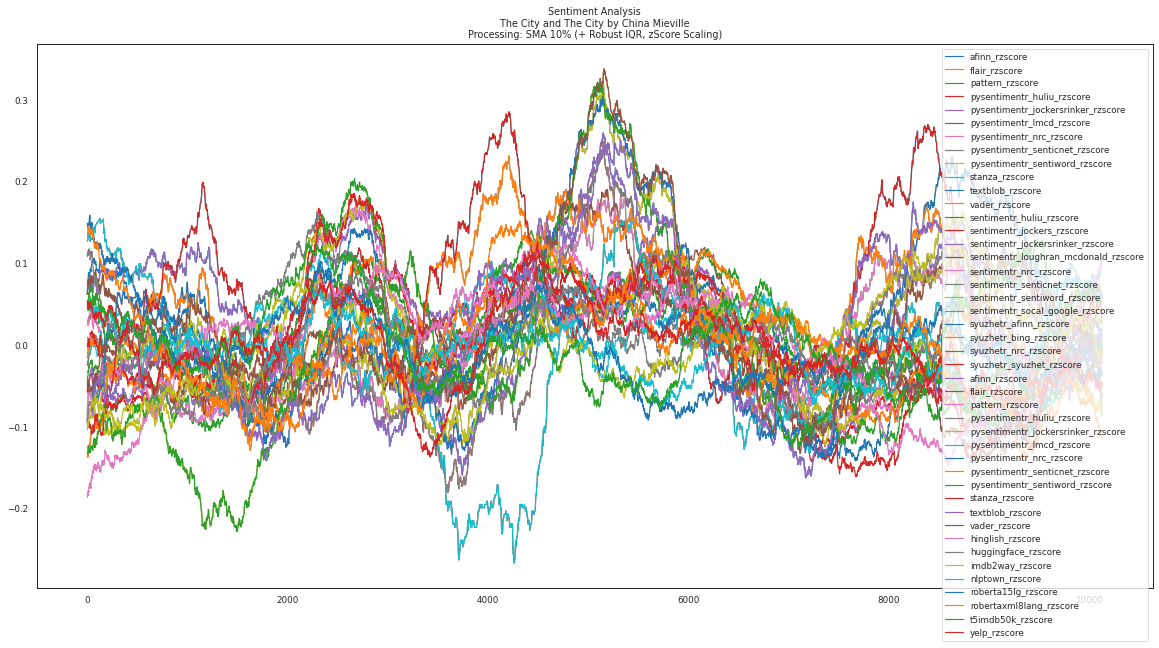

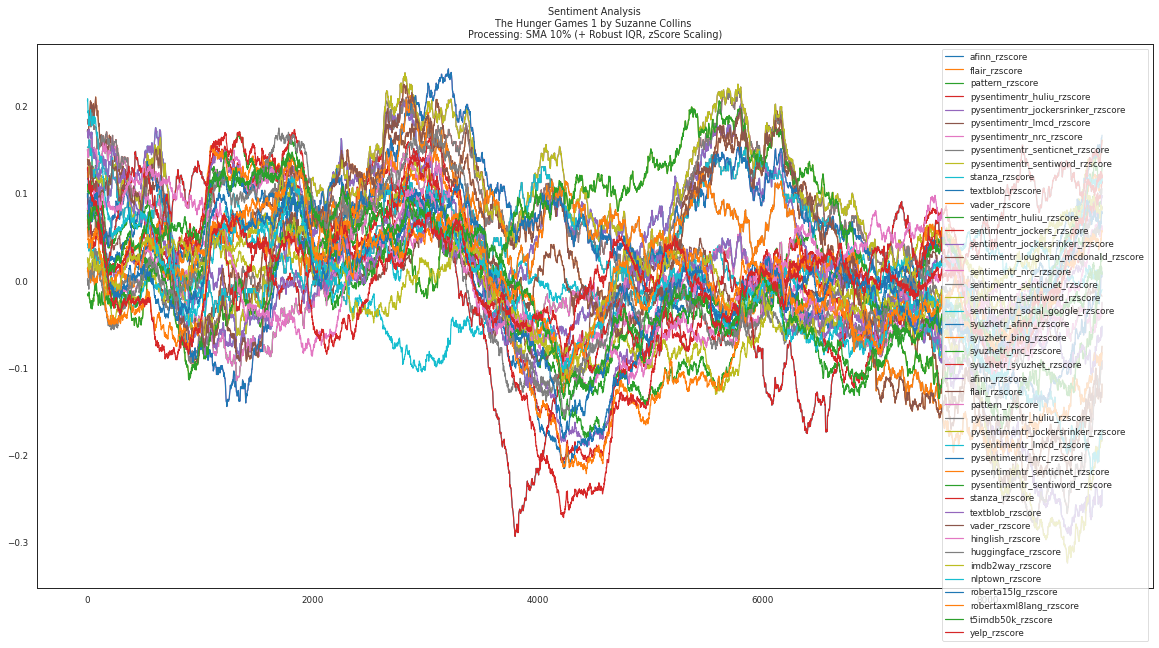

In [31]:
# Plot Sentiment Time Series for all Models in this Notebook run so far

for i, atitle in enumerate(corpus_titles_ls):
  col_rzscores_ls = []
  print(f"Title #{i}: {atitle}")
  df = corpus_texts_dt[atitle].copy()
  numeric_cols_ls = df.select_dtypes(include=[np.number]).columns
  for anum_col_str in numeric_cols_ls:
    anum_col_robust_np = r_scaler.fit_transform(df[anum_col_str].values.reshape(-1, 1) )
    anum_col_rzscore_np = z_scaler.fit_transform(anum_col_robust_np)
    anum_col_rzscore_str = f'{anum_col_str}_rzscore'
    df[anum_col_rzscore_str] = pd.Series(anum_col_rzscore_np.squeeze(-1,))
    col_rzscores_ls.append(anum_col_rzscore_str)


  win_10per = int(0.10 * df.shape[0])
  df[col_rzscores_ls].rolling(win_10per, center=True, min_periods=0).mean().plot(title=f"Sentiment Analysis\n{corpus_titles_dt[atitle][0]}\nProcessing: SMA 10% (+ Robust IQR, zScore Scaling)")

In [ ]:
print(f'Trying to find EXISTING Raw Sentiment Datafile:\n  [{FNAME_SENTIMENT_RAW}]\n  in Raw Sentiment Subdir: {SUBDIR_SENTIMENT_RAW}\n')

corpus_texts_dt = {}
subdir_sentiment_raw_ls = os.listdir(SUBDIR_SENTIMENT_RAW)

if FNAME_SENTIMENT_RAW not in subdir_sentiment_raw_ls:
  # No Existing Raw Sentiment Data, Just read in Clean Text
  print(f'No EXISTING Raw Sentiment Datafile exists, Start from Stratch...\n')

  # Create a List (preprocessed_ls) of all preprocessed text files
  try:
    preprocessed_ls = glob(f'{SUBDIR_TEXT_CLEAN}*.csv')
    preprocessed_ls = [x.split('/')[-1] for x in preprocessed_ls]
    preprocessed_ls = [x.split('.')[0] for x in preprocessed_ls]
  except IndexError:
    raise RuntimeError('No csv file found')

  # Read all preprocessed text files into master DataFrame (corpus_dt)
  for i,anovel in enumerate(preprocessed_ls):
    print(f'Processing #{i}: {anovel}...')
    afile_fullpath = f'{SUBDIR_TEXT_CLEAN}{anovel}.csv'
    print(f'               {afile_fullpath}')
    anovel_df = pd.read_csv(afile_fullpath, index_col=[0])
    corpus_texts_dt[anovel] = anovel_df

  print('\n'.join(preprocessed_ls))
  print('\n')
  print(f'Found {len(preprocessed_ls)} Preprocessed files in {SUBDIR_TEXT_CLEAN}')
else:
  # Found Existing Raw Sentiment Data with Clean Text, Read Both
  print(f'Found EXISTING  Raw Sentiment Datafile exists, Loading...\n')
  corpus_texts_dt = read_dict_dfs(in_file=FNAME_SENTIMENT_RAW, in_dir=SUBDIR_SENTIMENT_RAW)
  print(f'The  Models have Analyzed these Texts in the Corpus:\n\n  {corpus_texts_dt.keys()}\n\n')    

# Verify Corpus DataFrame
corpus_titles_ls = list(corpus_texts_dt.keys())
# corpus_texts_dt[corpus_titles_ls[0]].head()
corpus_texts_dt[corpus_titles_ls[0]].info()

Trying to find EXISTING Raw Sentiment Datafile:
  [sentiment_raw_novels_new_dnn2transformer.json]
  in Raw Sentiment Subdir: ./sentiment_raw/novels_sentiment_new_raw/

Found EXISTING  Raw Sentiment Datafile exists, Loading...

The  Models have Analyzed these Texts in the Corpus:

  dict_keys(['cmieville_thecityandthecity', 'scollins_thehungergames1'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10125 entries, 0 to 10124
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hinglish         10125 non-null  int64  
 1   huggingface      10125 non-null  float64
 2   imdb2way         10125 non-null  int64  
 3   nlptown          10125 non-null  float64
 4   roberta15lg      10125 non-null  float64
 5   robertaxml8lang  10125 non-null  float64
 6   t5imdb50k        10125 non-null  int64  
 7   text_clean       10125 non-null  object 
 8   text_raw         10125 non-null  object 
 9   yelp             10125 n


# **[STEP 5] Time Series and Crux Point Analysis**

* https://github.com/patil-suraj/exploring-T5/blob/master/t5_fine_tuning.ipynb


# **END OF NOTEBOOK**